In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
SHOW_FIGURES = True

In [3]:
if not SHOW_FIGURES:
    matplotlib.use("pgf")
    matplotlib.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,
        'text.latex.preamble' : r'\newcommand{\mathdefault}[1][]{}'
    })

pd.set_option('display.max_rows', 10000)

In [4]:
po_path = './PO/results/parallel_machines/results.csv'
bpic_path = './BPIC/results/parallel_machines/results.csv'

In [5]:
csv_dict = []
def load_file(file_path, csv_dict):
    with open(file_path, 'r') as file:
        # Iterate over each line in the fileplt.plot(x_fit, y_fit, color='green', label='Polynomial Approximation')
        for line in file:
            # Split the line content by comma
            line_data = line.strip().split(',')
    
            if len(line_data) == 7:
                seven_keys = ['delta', 'state', 'time', 'occupation', 'fairness', 'allocated', 'skipped']
                csv_dict.append(dict(zip(seven_keys, line_data)))
    
            elif len(line_data) == 15:
                fifteen_keys = ['method', 'execution time', 'delta', 'average make span', 'result message',
                                'makespan', 'resource occupation', 'resource fairness',
                                'assigned tasks', 'allocated tasks', 'postponed tasks',
                                'optimal solution', 'feasible solution', 'no solution',
                                'resource worklist rule'
                                ]
                csv_dict.append(dict(zip(fifteen_keys, line_data)))
            elif len(line_data) == 19:
                nineteen_keys = ['method', 'start time', 'end time', 'real execution time', 'system execution time',
                                 'delta', 'average make span', 'result message',
                                'makespan', 'resource occupation', 'resource fairness', 'weighted resource fairness',
                                'assigned tasks', 'allocated tasks', 'postponed tasks',
                                'optimal solution', 'feasible solution', 'no solution',
                                'resource worklist rule'
                                ]
                row_dict = dict(zip(nineteen_keys, line_data))
                for k in ['optimal solution', 'feasible solution', 'no solution']:
                    if row_dict[k] == '':
                        row_dict[k] = 0
                csv_dict.append(row_dict)
            else:
                print(len(line_data))

df_dtypes = {'method' : str, 'start time' : str, 'end time' : str, 'real execution time' : float, 'system execution time' : float,
             'delta' : float, 'makespan' : float, 'result message' : str,
             'makespan' : float, 'resource occupation' : float, 'resource fairness' : float, 'weighted resource fairness' : float,
             'assigned tasks' : int, 'allocated tasks' : int, 'postponed tasks' : int,
             'optimal solution' : int, 'feasible solution' : int, 'no solution' : int,
             'resource worklist rule' : str}

bpic_dict = []
load_file(bpic_path, bpic_dict)
bpic_df = pd.DataFrame(bpic_dict)
bpic_df['data_set'] = 'BPIC'

po_dict = []
load_file(po_path, po_dict)
po_df = pd.DataFrame(po_dict)
po_df['data_set'] = 'PO'

for k, v in df_dtypes.items():
    bpic_df[k] = bpic_df[k].astype(v)
    po_df[k] = po_df[k].astype(v)

df = pd.concat([bpic_df, po_df], axis=0)

In [6]:
df = df[(df['method'] == 'MILP') & (df['resource worklist rule'] == 'fastest')]
df.reset_index(inplace=True)
df

,index,method,start time,end time,real execution time,system execution time,delta,average make span,result message,makespan,...,resource fairness,weighted resource fairness,assigned tasks,allocated tasks,postponed tasks,optimal solution,feasible solution,no solution,resource worklist rule,data_set
0,0,MILP,2024-03-09 14:24:03,2024-03-10 20:38:50,108887.550113,608297.230913,1.92,10.924662414273591,COMPLETED: you completed 1680 hours of simulat...,11.022870,...,0.032380,0.989419,80721,386709,44810,37684,42737,595,fastest,BPIC
1,1,MILP,2024-03-10 20:38:51,2024-03-11 22:49:51,94260.510426,536360.055306,1.94,10.321034375319845,COMPLETED: you completed 1680 hours of simulat...,10.398222,...,0.029534,0.935187,76778,355001,37479,40050,37138,25,fastest,BPIC
2,2,MILP,2024-03-09 12:15:13,2024-03-10 14:33:37,94704.465797,668310.280287,1.96,11.867763746050262,COMPLETED: you completed 1680 hours of simulat...,12.045915,...,0.037732,1.344368,72497,357255,29602,35065,37773,4,fastest,BPIC
3,3,MILP,2024-03-10 14:33:38,2024-03-11 15:20:35,89217.353832,639605.768897,1.98,10.702665860666718,COMPLETED: you completed 1680 hours of simulat...,10.810315,...,0.035367,1.300735,73217,341217,17953,38324,35215,2,fastest,BPIC
4,4,MILP,2024-03-11 15:20:35,2024-03-12 19:54:52,102856.332984,735951.058291,2.00,12.188337330282128,COMPLETED: you completed 1680 hours of simulat...,12.283658,...,0.056005,2.023325,75206,368756,49806,33957,41543,8,fastest,BPIC
5,10,MILP,2024-02-23 17:57:26,2024-02-24 20:13:15,94548.505701,705367.604858,1.80,11.21785407727812,COMPLETED: you completed 1680 hours of simulat...,11.284227,...,0.035934,1.193505,73060,352048,26313,35226,38108,5,fastest,BPIC
6,11,MILP,2024-02-24 20:13:15,2024-02-26 02:42:31,109756.160047,799977.746342,1.82,13.216064538883066,COMPLETED: you completed 1680 hours of simulat...,13.274207,...,0.038417,0.778632,78062,396214,37787,34676,43690,24,fastest,BPIC
7,12,MILP,2024-02-26 02:42:32,2024-02-27 06:35:02,100350.025864,737927.771083,1.84,11.363404841834354,COMPLETED: you completed 1680 hours of simulat...,11.418869,...,0.029346,0.775404,77422,373052,29561,37785,39869,3,fastest,BPIC
8,13,MILP,2024-02-27 06:35:02,2024-02-28 08:40:38,93935.724075,694161.024478,1.86,11.984129838623955,COMPLETED: you completed 1680 hours of simulat...,12.013045,...,0.042291,1.075759,74043,349436,22584,37281,37048,11,fastest,BPIC
9,14,MILP,2024-02-28 08:40:38,2024-02-29 11:28:26,96468.482492,711185.035482,1.88,12.210537474393403,COMPLETED: you completed 1680 hours of simulat...,12.292568,...,0.030930,1.207153,76651,357245,42634,38163,38830,17,fastest,BPIC


In [7]:
# Df has some values like delta=1.99
# Filter so that distances are 0.02 e.g. [..., 1.94, 1.96, 1.98, 2.0]
n = 1000
#df = df[((df['delta']*n).astype(int) % int(0.02 * n)) == 0]
df['delta'] = df['delta'].round(2)
df

,index,method,start time,end time,real execution time,system execution time,delta,average make span,result message,makespan,...,resource fairness,weighted resource fairness,assigned tasks,allocated tasks,postponed tasks,optimal solution,feasible solution,no solution,resource worklist rule,data_set
0,0,MILP,2024-03-09 14:24:03,2024-03-10 20:38:50,108887.550113,608297.230913,1.92,10.924662414273591,COMPLETED: you completed 1680 hours of simulat...,11.022870,...,0.032380,0.989419,80721,386709,44810,37684,42737,595,fastest,BPIC
1,1,MILP,2024-03-10 20:38:51,2024-03-11 22:49:51,94260.510426,536360.055306,1.94,10.321034375319845,COMPLETED: you completed 1680 hours of simulat...,10.398222,...,0.029534,0.935187,76778,355001,37479,40050,37138,25,fastest,BPIC
2,2,MILP,2024-03-09 12:15:13,2024-03-10 14:33:37,94704.465797,668310.280287,1.96,11.867763746050262,COMPLETED: you completed 1680 hours of simulat...,12.045915,...,0.037732,1.344368,72497,357255,29602,35065,37773,4,fastest,BPIC
3,3,MILP,2024-03-10 14:33:38,2024-03-11 15:20:35,89217.353832,639605.768897,1.98,10.702665860666718,COMPLETED: you completed 1680 hours of simulat...,10.810315,...,0.035367,1.300735,73217,341217,17953,38324,35215,2,fastest,BPIC
4,4,MILP,2024-03-11 15:20:35,2024-03-12 19:54:52,102856.332984,735951.058291,2.00,12.188337330282128,COMPLETED: you completed 1680 hours of simulat...,12.283658,...,0.056005,2.023325,75206,368756,49806,33957,41543,8,fastest,BPIC
5,10,MILP,2024-02-23 17:57:26,2024-02-24 20:13:15,94548.505701,705367.604858,1.80,11.21785407727812,COMPLETED: you completed 1680 hours of simulat...,11.284227,...,0.035934,1.193505,73060,352048,26313,35226,38108,5,fastest,BPIC
6,11,MILP,2024-02-24 20:13:15,2024-02-26 02:42:31,109756.160047,799977.746342,1.82,13.216064538883066,COMPLETED: you completed 1680 hours of simulat...,13.274207,...,0.038417,0.778632,78062,396214,37787,34676,43690,24,fastest,BPIC
7,12,MILP,2024-02-26 02:42:32,2024-02-27 06:35:02,100350.025864,737927.771083,1.84,11.363404841834354,COMPLETED: you completed 1680 hours of simulat...,11.418869,...,0.029346,0.775404,77422,373052,29561,37785,39869,3,fastest,BPIC
8,13,MILP,2024-02-27 06:35:02,2024-02-28 08:40:38,93935.724075,694161.024478,1.86,11.984129838623955,COMPLETED: you completed 1680 hours of simulat...,12.013045,...,0.042291,1.075759,74043,349436,22584,37281,37048,11,fastest,BPIC
9,14,MILP,2024-02-28 08:40:38,2024-02-29 11:28:26,96468.482492,711185.035482,1.88,12.210537474393403,COMPLETED: you completed 1680 hours of simulat...,12.292568,...,0.030930,1.207153,76651,357245,42634,38163,38830,17,fastest,BPIC


In [8]:
df.dtypes

index                           int64
method                         object
start time                     object
end time                       object
real execution time           float64
system execution time         float64
delta                         float64
average make span              object
result message                 object
makespan                      float64
resource occupation           float64
resource fairness             float64
weighted resource fairness    float64
assigned tasks                  int64
allocated tasks                 int64
postponed tasks                 int64
optimal solution                int64
feasible solution               int64
no solution                     int64
resource worklist rule         object
data_set                       object
dtype: object

In [9]:
# When two equal delta values are present sample a random one
result = df.groupby(['data_set', 'delta']).sample(n=1).reset_index()
#result
df = result

In [10]:
result.sort_values(['data_set', 'delta'], inplace=True)
result

,level_0,index,method,start time,end time,real execution time,system execution time,delta,average make span,result message,...,resource fairness,weighted resource fairness,assigned tasks,allocated tasks,postponed tasks,optimal solution,feasible solution,no solution,resource worklist rule,data_set
0,40,50,MILP,2024-02-23 17:05:43,2024-02-25 03:25:57,123613.905513,864513.798659,0.90,16.98928959977336,COMPLETED: you completed 1680 hours of simulat...,...,0.048447,1.611248,77278,421073,394053,27611,49759,292,fastest,BPIC
1,41,51,MILP,2024-02-25 03:25:57,2024-02-26 14:07:34,124896.897371,866308.775991,0.92,15.66547980494014,COMPLETED: you completed 1680 hours of simulat...,...,0.037538,1.549728,77489,432499,380599,26774,50988,77,fastest,BPIC
2,42,52,MILP,2024-02-26 14:07:34,2024-02-27 19:01:14,104019.842527,740770.919586,0.94,12.924729103389819,COMPLETED: you completed 1680 hours of simulat...,...,0.038704,1.579435,75222,377748,446952,34393,41236,9,fastest,BPIC
3,43,53,MILP,2024-02-27 19:01:14,2024-02-28 22:46:17,99902.388052,714822.330240,0.96,12.97971510776709,COMPLETED: you completed 1680 hours of simulat...,...,0.034968,1.618293,72971,364274,308918,33186,40130,92,fastest,BPIC
4,44,54,MILP,2024-02-28 22:46:17,2024-03-01 07:01:18,116100.302322,832595.644836,0.98,12.77388911766641,COMPLETED: you completed 1680 hours of simulat...,...,0.026861,1.344742,79425,418832,368352,32864,47072,9,fastest,BPIC
5,10,20,MILP,2024-02-23 01:15:26,2024-02-24 10:43:31,120485.456122,399389.773160,1.00,13.98365273792613,COMPLETED: you completed 1680 hours of simulat...,...,0.037660,1.547394,74706,363636,359747,29882,42419,2767,fastest,BPIC
6,11,21,MILP,2024-02-24 10:43:32,2024-02-26 03:00:47,145035.502079,469362.127773,1.02,18.572761079947,COMPLETED: you completed 1680 hours of simulat...,...,0.035024,1.129866,80154,375501,547474,26839,47090,6587,fastest,BPIC
7,12,22,MILP,2024-02-26 03:00:48,2024-02-27 11:11:22,115834.556907,383400.628505,1.04,13.188213676100446,COMPLETED: you completed 1680 hours of simulat...,...,0.059785,2.173679,73608,351860,317345,31052,41056,1904,fastest,BPIC
8,13,23,MILP,2024-02-27 11:11:22,2024-02-28 22:23:32,126729.170755,417098.153503,1.06,15.346183814864434,COMPLETED: you completed 1680 hours of simulat...,...,0.039840,1.372316,76198,365298,259186,29390,43287,3965,fastest,BPIC
9,14,24,MILP,2024-02-28 22:23:32,2024-03-01 08:07:30,121437.948591,414810.198822,1.08,13.82061068189199,COMPLETED: you completed 1680 hours of simulat...,...,0.035328,1.466386,76238,354549,324674,31356,41981,3343,fastest,BPIC


In [11]:
from scipy.optimize import curve_fit

def polynomial_func(x, *coeffs):
    return sum(c * x**i for i, c in enumerate(coeffs))

degree = 2  # Adjust the degree of the polynomial
params, _ = curve_fit(polynomial_func, df['delta'], df['makespan'], p0=[1] * (degree + 1))

x_fit = np.linspace(df['delta'].min(), df['delta'].max(), 100)
y_fit = polynomial_func(x_fit, *params)



In [12]:
df = df[df['result message'] != 'Stopped']
df = df.sort_values(by='delta')

<Figure size 640x480 with 0 Axes>

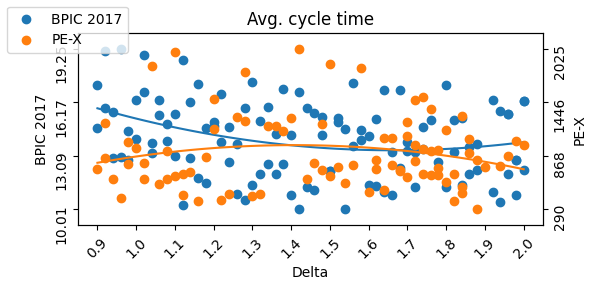

<Figure size 640x480 with 0 Axes>

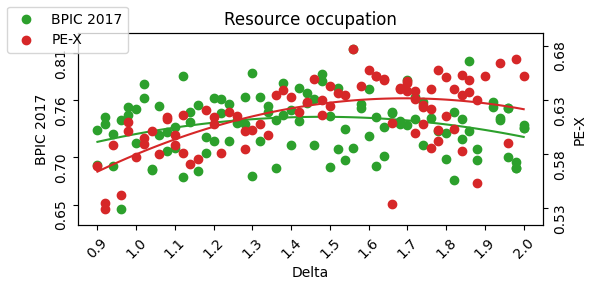

<Figure size 640x480 with 0 Axes>

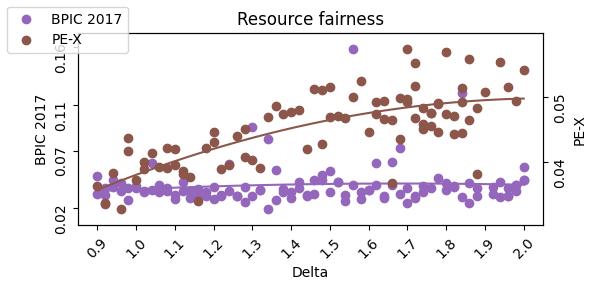

<Figure size 640x480 with 0 Axes>

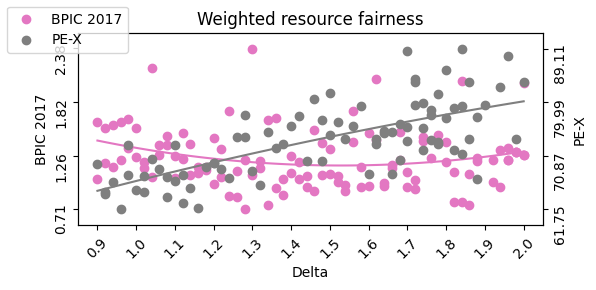

KeyError: 'Delta'

In [13]:
def plot(df_1, df_2, df_names,labels=None, colors=plt.rcParams["axes.prop_cycle"](), degree=2, yrange=None):
    x1 = df_1[df_names[0]]
    y1 = df_1[df_names[1]]
    y1_range = max(y1) - min(y1)
    x2 = df_2[df_names[0]]
    y2 = df_2[df_names[1]]
    y2_range = max(y2) - min(y2)
    
    plt.clf()
    #fig = plt.gcf()
    fig, ax1 = plt.subplots()
    fig.set_size_inches(6, 2.5)
    plt.xlim(0.85, 2.05)
    plt.xticks(rotation=45)
    plt.yticks(rotation=90)
    plt.xticks(np.linspace(0.9, 2.0, 12))
    #plt.tight_layout(pad=5)
    plt.margins(x=0.3, y=0.1)
    
    # Set labels and title
    if labels:
        plt.xlabel(labels[0])
        #plt.ylabel(labels[1])
        plt.title(labels[1])
    else:
        plt.xlabel('x')
        plt.ylabel('y')

    """
    if yrange:
        plt.ylim(yrange[0], yrange[1])
        plt.yticks(np.linspace(yrange[0], yrange[1], 11))
    else:
        y_range = max(y1.max(), y2.max()) - min(y1.min(), y2.min())
        plt.ylim(min(y1.min(), y2.min()) - 0.1*y_range,  max(y1.max(), y2.max()) + 0.1*y_range)
        plt.yticks(np.linspace(min(y1.min(), y2.min()),  max(y1.max(), y2.max()), 10))
    """

    # Plot the data
    p = plt.scatter(x1, y1, marker='o', color=next(colors)['color'], label='BPIC 2017')
    params, _ = curve_fit(polynomial_func, x1, y1, p0=[1] * (degree + 1))
    
    x_fit = np.linspace(x1.min(), x1.max(), 100)
    y_fit = polynomial_func(x_fit, *params)

    ax1.set_yticks(np.round(np.linspace(min(y1), max(y1), 4), 2))
    ax1.set_ylim(min(y1)-y1_range*0.1, max(y1) + y1_range*0.1)
    ax1.plot(x_fit, y_fit, color=p.get_facecolor())
    ax1.set_ylabel('BPIC 2017')
    ax2 = ax1.twinx()

    p = plt.scatter(x2, y2, marker='o', color=next(colors)['color'], label='PE-X')
    params, _ = curve_fit(polynomial_func, x2, y2, p0=[1] * (degree + 1))
    
    x_fit = np.linspace(x2.min(), x2.max(), 100)
    y_fit = polynomial_func(x_fit, *params)
    ax2.plot(x_fit, y_fit, color=p.get_facecolor())
    ax2.tick_params(axis="y",labelrotation=90)
    ax2.set_yticks(np.round(np.linspace(min(y2), max(y2), 4), 2))
    ax2.set_ylim(min(y2)-y2_range*0.1, max(y2) + y2_range*0.1)
    ax2.set_ylabel('PE-X')
    fig.legend(loc="upper left")
    
    # Show the plot
    if  not SHOW_FIGURES:
        plt.savefig('parallel_machines_scheduling_' + labels[0] + '_' + labels[1] + '.pgf')
    plt.show()


colors = plt.rcParams["axes.prop_cycle"]()

plot(bpic_df, po_df, ('delta', 'makespan'), ('Delta', 'Avg. cycle time'), colors=colors)
plot(bpic_df, po_df, ('delta', 'resource occupation'), ('Delta', 'Resource occupation'), colors=colors)
plot(bpic_df, po_df, ('delta', 'resource fairness'), ('Delta', 'Resource fairness'), colors=colors)
plot(bpic_df, po_df, ('delta', 'weighted resource fairness'), ('Delta', 'Weighted resource fairness'), colors=colors)


plot(df['delta'], df['resource occupation'], ('Delta', 'Resource occupation'), colors=colors, yrange=(0.5,1))
plot(df['delta'], df['resource fairness'], ('Delta', 'Resource fairness'), colors=colors, yrange=(0.0,0.1))
plot(df['delta'], df['weighted resource fairness'], ('Delta', 'Weighted resource fairness'), colors=colors, yrange=(0.5,3.5))
plot(df['delta'], df['postponed tasks'], ('Delta', 'Postponed tasks'), colors=colors)
plot(df['delta'], df['allocated tasks'], ('Delta', 'Allocated tasks'), colors=colors)
plot(df['delta'], df['allocated tasks'], ('Delta', 'Assigned tasks'), colors=colors)